In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

### Fraction of flare stars by color

Text(0.5, 1.0, 'N = 2467 out of 118886 (2.08%)')

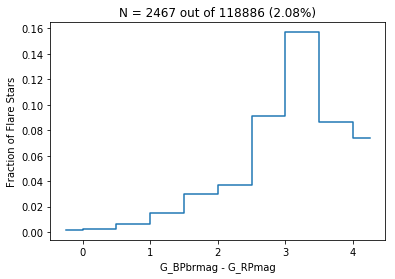

In [9]:
df_flare_g = pd.read_csv('1to13_filt_gaia_flare_out.csv')
df_param_g = pd.read_csv('1to13_gaia_param_out.csv')
df_param_g['rot_per'] = 2*np.pi/np.exp(df_param_g['log_w0'])
df_flare_g['rot_per'] = df_param_g['rot_per']

color_bins = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

# All TESS-Gaia stars in sample
df_param_g_dup = df_param_g.drop_duplicates(subset=['TIC'])
color_all = df_param_g_dup['G_BPbrmag'] - df_param_g_dup['G_RPmag']
# Some color values are NaNs
mask = np.isfinite(color_all)
hist_all, bins_all = np.histogram(color_all[mask], bins=color_bins)
bins_all = 0.5*(bins_all[1:] + bins_all[:-1])
#plt.plot(bins_all, hist_all, linestyle='steps-mid')

# Flare stars in TESS-Gaia sample
flare_stars = df_flare_g.drop_duplicates(subset=['TIC']) # Each row in the table counts a single flare, we only care about # of flare stars here
color_flare = flare_stars['G_BPbrmag'] - flare_stars['G_RPmag']
mask = np.isfinite(color_flare)
hist_flare, bins_flare = np.histogram(color_flare[mask], bins=color_bins)
bins_flare = 0.5*(bins_flare[1:] + bins_flare[:-1])
#plt.plot(bins_flare, hist_flare, linestyle='steps-mid')
plt.plot(bins_flare, hist_flare/hist_all, linestyle='steps-mid')

plt.xlabel('G_BPbrmag - G_RPmag')
plt.ylabel('Fraction of Flare Stars')
nf = len(color_flare)
na = len(color_all)
plt.title('N = ' + str(nf) + ' out of ' + str(na) + ' ({:.2f}'.format(nf/na*100) + '%)')

Text(0.5, 1.0, 'N = 1303 < 13 d')

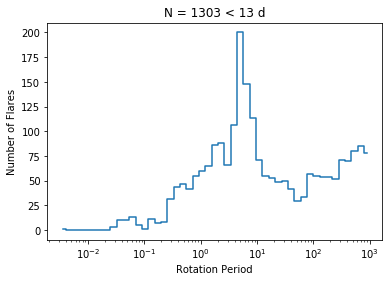

In [3]:
q = df_flare_g['rot_per']
hist, bins = np.histogram(q, bins=np.logspace(np.log10(np.min(q)), np.log10(1000)))
bins = 0.5*(bins[1:] + bins[:-1])
plt.plot(bins, hist, linestyle='steps-mid')
plt.xscale('log')
plt.xlabel('Rotation Period')
plt.ylabel('Number of Flares')
plt.title('N = ' + str(len(q[q <= 13])) + ' < 13 d')

In [13]:
keptess = pd.read_hdf('kep_tess.h5')

### Rotation period vs number of stars

Text(0, 0.5, 'Number of Stars')

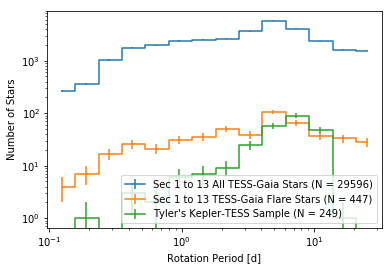

In [55]:
rotbins = np.logspace(-1, np.log10(30), num=15)

df = pd.read_csv('1to13_rot_param_out.csv')
df['rot_per'] = 2*np.pi/np.exp(df['log_w0'])
df_star = df.drop_duplicates(subset=['TIC'])

# All stars in TESS-Gaia crossmatch
df_g_star = df_param_g.drop_duplicates(subset=['TIC'])
hist, bins = np.histogram(df_g_star['rot_per'], bins=rotbins)
bins = 0.5*(bins[1:] + bins[:-1])
na = len(df_g_star[df_g_star['rot_per'] <= 13])
plt.errorbar(bins, hist, linestyle='steps-mid', yerr=np.sqrt(hist), label='Sec 1 to 13 All TESS-Gaia Stars (N = ' + str(na) + ')')

# Flare stars in TESS-Gaia crossmatch
hist, bins = np.histogram(flare_stars['rot_per'], bins=rotbins)
bins = 0.5*(bins[1:] + bins[:-1])
ns = len(flare_stars[flare_stars['rot_per'] <= 13])
plt.errorbar(bins, hist, linestyle='steps-mid', yerr=np.sqrt(hist), label='Sec 1 to 13 TESS-Gaia Flare Stars (N = ' + str(ns) + ')')

hist, bins = np.histogram(keptess['P_mean'].values, bins=rotbins)
bins = 0.5*(bins[1:] + bins[:-1])
nt = len(keptess)
plt.errorbar(bins, hist, linestyle='steps-mid', yerr=np.sqrt(hist), label='Tyler\'s Kepler-TESS Sample (N = ' + str(nt) + ')')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rotation Period [d]')
plt.ylabel('Number of Stars')

### CMD of flare stars

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'Gmag')

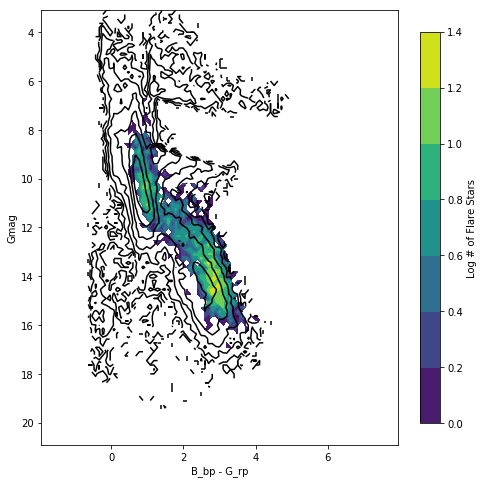

In [53]:
from scipy.stats import binned_statistic_2d

fig, axes = plt.subplots(figsize=(8,8))

nbins = 100
xmin, xmax = -2, 8
ymin, ymax = 3, 21
xbins = np.linspace(xmin, xmax, nbins)
ybins = np.linspace(ymin, ymax, nbins)
result1 = binned_statistic_2d(color_all, df_param_g_dup['G_mag'], color_all, bins=[xbins, ybins], statistic='count')
count1 = np.log10(result1.statistic)
binsX1 = 0.5*(result1.x_edge[1:] + result1.x_edge[:-1])
binsY1 = 0.5*(result1.y_edge[1:] + result1.y_edge[:-1])
axes.contour(binsX1, binsY1, np.flipud(np.rot90(count1)), colors='k')

result2 = binned_statistic_2d(color_flare, flare_stars['G_mag'], color_all, bins=[xbins, ybins], statistic='count')
count2 = np.log10(result2.statistic)
binsX2 = 0.5*(result2.x_edge[1:] + result2.x_edge[:-1])
binsY2 = 0.5*(result2.y_edge[1:] + result2.y_edge[:-1])
cs = axes.contourf(binsX2, binsY2, np.flipud(np.rot90(count2)))
fig.colorbar(cs, ax=axes, shrink=0.9, label='Log # of Flare Stars')

axes.invert_yaxis()
axes.set_xlabel('B_bp - G_rp')
axes.set_ylabel('Gmag')

### Rotation period vs flare rate, binned by color

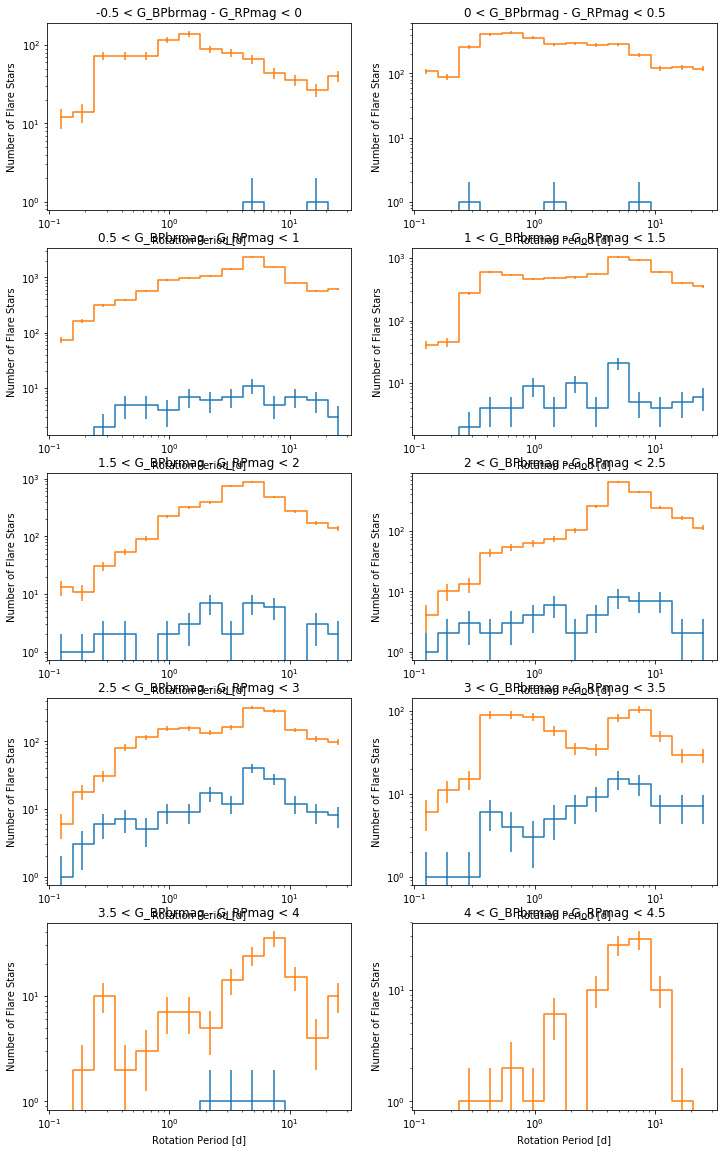

In [56]:
nc = len(color_bins)
fig, axes = plt.subplots(figsize=(12, nc//2*4), nrows=nc//2, ncols=2)

for idx in range(nc - 1):
    c1, c2 = color_bins[idx], color_bins[idx+1]
    
    ax = axes[idx//2][idx%2]
    
    mask = (color_flare >= c1) & (color_flare < c2)
    hist_f, bins_f = np.histogram(flare_stars[mask]['rot_per'], bins=rotbins)
    bins_f = 0.5*(bins_f[1:] + bins_f[:-1])
    ax.errorbar(bins_f, hist_f, yerr=np.sqrt(hist_f), linestyle='steps-mid')
    
    mask = (color_all >= c1) & (color_all < c2)
    hist_all, bins_all = np.histogram(df_g_star[mask]['rot_per'], bins=rotbins)
    bins_all = 0.5*(bins_all[1:] + bins_all[:-1])
    ax.errorbar(bins_all, hist_all, yerr=np.sqrt(hist_all), linestyle='steps-mid')
    
    ax.set_title(str(c1) + ' < G_BPbrmag - G_RPmag < ' + str(c2))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Rotation Period [d]')
    ax.set_ylabel('Number of Flare Stars')

Text(0, 0.5, 'Fraction of Flare Stars')

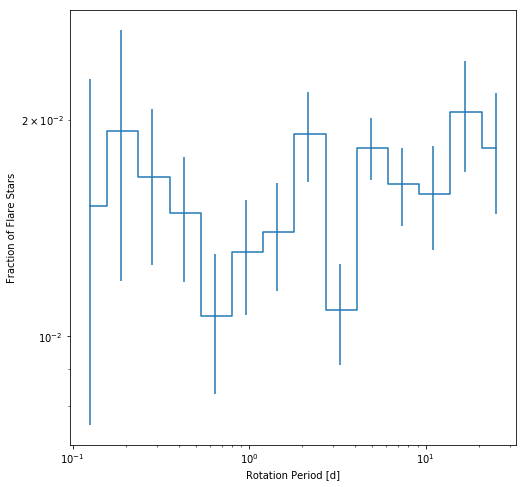

In [57]:
fig, axes = plt.subplots(figsize=(8, 8))
    
hist_f, bins_f = np.histogram(flare_stars['rot_per'], bins=rotbins)
bins_f = 0.5*(bins_f[1:] + bins_f[:-1])

hist_all, bins_all = np.histogram(df_g_star['rot_per'], bins=rotbins)
bins_all = 0.5*(bins_all[1:] + bins_all[:-1])

yerr = np.sqrt((hist_f/hist_all**2) + (hist_f**2/hist_all**3))
label = str(c1) + ' < G_BPbrmag - G_RPmag < ' + str(c2)
axes.errorbar(bins_all, hist_f/hist_all, yerr=yerr, linestyle='steps-mid', label=label)

axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Rotation Period [d]')
axes.set_ylabel('Fraction of Flare Stars')

Text(0, 0.5, 'Flare Energy [erg]')

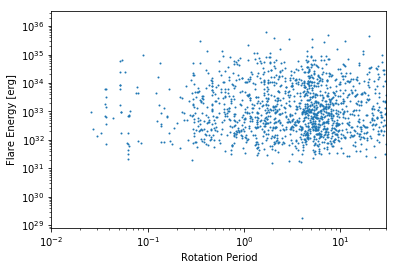

In [58]:
plt.scatter(df_flare_g['rot_per'], df_flare_g['energy'], s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 30)
plt.xlabel('Rotation Period')
plt.ylabel('Flare Energy [erg]')

### FFD by color

In [63]:
from os import path
# One extra piece of information I need:
# How many days was each target observed by TESS?

# This is really slow, save the results to a file
if not path.exists('num_obs.txt'):
    # To start, get all of the TICs with a flare detection
    flare_tics = df_flare_g['TIC'].values.astype(int)

    # For each TIC, determine how many files are associated with it
    num_obs = np.zeros_like(flare_tics)
    # We can search all lines at once in the text file with pandas
    files = pd.read_csv('1to13_files.txt', header=None)

    for idx, TIC in enumerate(flare_tics):
        num_obs[idx] = len(np.where(files[0].str.contains(str(flare_tics[idx]).zfill(16)) == True)[0])

    np.savetxt('num_obs.txt', (flare_tics, num_obs))
    
else:
    flare_tics, num_obs = np.loadtxt('num_obs.txt')

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(-2.5, 2)

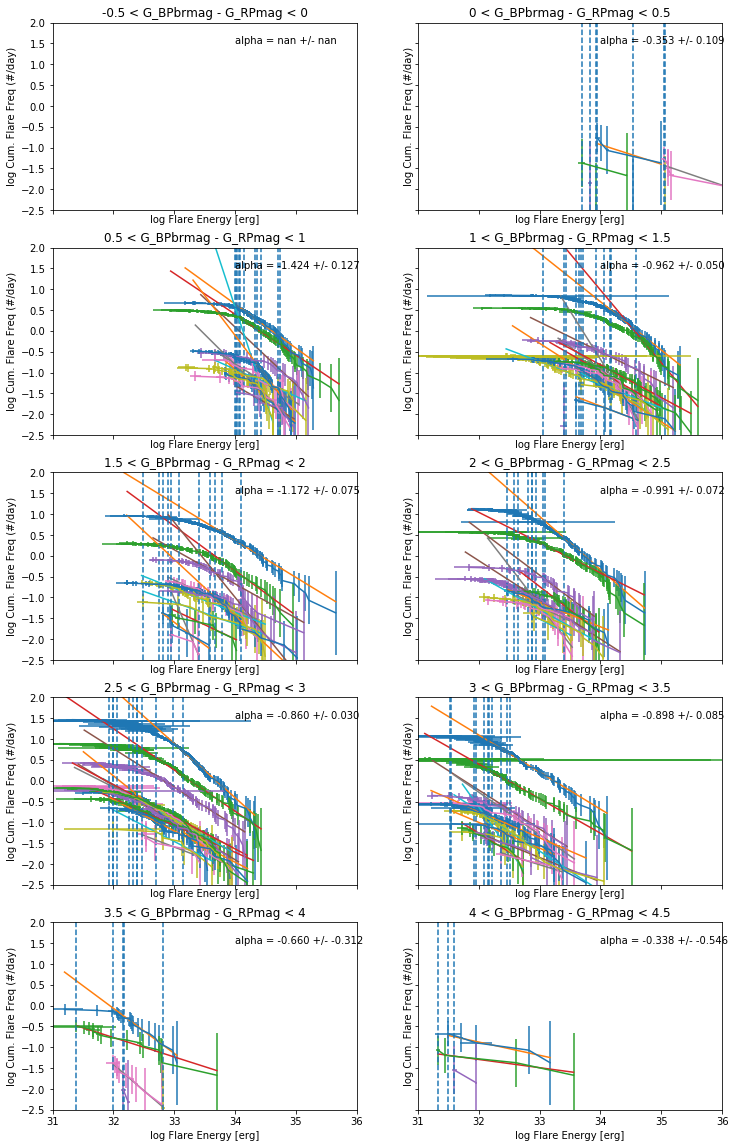

In [76]:
from FFD import FFD, FFD_powerlaw, FlareKernel

fig, axes = plt.subplots(figsize=(12, nc//2*4), nrows=nc//2, ncols=2, sharex=True, sharey=True)
for idx in range(nc - 1):
    c1, c2 = color_bins[idx], color_bins[idx+1]
    mask = (color_flare >= c1) & (color_flare < c2)
    ax = axes[idx//2][idx%2]
    
    b0_vals = []
    b0_err_vals = []
    
    for no in np.arange(1, np.max(num_obs)):
        tess_time = 23.4*no
        mask_no = np.isin(df_flare_g['TIC'], flare_tics[num_obs == no])
        df_sub = df_flare_g[mask_no]
        
        c1, c2 = color_bins[idx], color_bins[idx+1]
        color = df_sub['G_BPbrmag'] - df_sub['G_RPmag']
        mask = (color >= c1) & (color < c2)
        
        ed_vals = (df_sub['ed'].values*u.d).to(1*u.s).value
        ed_err_vals = (df_sub['ed_err'].values*u.d).to(1*u.s).value
        x, y, xe, ye = FFD(ed_vals[mask], edErr=ed_err_vals[mask], Lum=df_sub[mask]['lum'].values, TOTEXP=tess_time)
        
        if len(x) < 1:
            continue
        
        ax.errorbar(x, y, xerr=xe, yerr=ye)
        
        b0, b1, b0_err, b1_err, cutoff = FFD_powerlaw(x, y, xe, ye, findXmin=True)

        xmodel = np.linspace(np.min(x), np.max(x))
        ymodel = b0*xmodel + b1

        ax.plot(xmodel, ymodel)
        ax.axvline(cutoff, linestyle='--')
        
        b0_vals.append(b0)
        b0_err_vals.append(b0_err)
        
    ax.annotate('alpha = {:.3f}'.format(np.mean(b0_vals)) + ' +/- {:.3f}'.format(np.mean(b0_err_vals)), xy=(34, 1.5))
    
    ax.set_title(str(c1) + ' < G_BPbrmag - G_RPmag < ' + str(c2))
    ax.set_xlabel('log Flare Energy [erg]')
    ax.set_ylabel('log Cum. Flare Freq (#/day)')
ax.set_xlim(31, 36)
ax.set_ylim(-2.5, 2)